# Lab 2

1. 提交作業之前，建議可以先點選上方工具列的**Kernel**，再選擇**Restart & Run All**，檢查一下是否程式跑起來都沒有問題，最後記得儲存。
2. 請先填上下方的姓名(name)及學號(stduent_id)再開始作答，例如：
```python
name = "我的名字"
student_id= "B06201000"
```
3. 四個求根演算法的實作可以參考[lab-2](https://yuanyuyuan.github.io/itcm/lab-2.html)，裡面有教學影片也有範例程式可以套用。
4. **Deadline: 10/9(Wed.)**

In [1]:
name = "歐陽秉志"
student_id = "B05201012"

---

# Exercise 1 - Bisection

### Use the bisection method to find roots of
### $$f(x)=cosh(x)+cos(x)-c \text{, for } c=1, 2, 3,$$

---

### Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### 1. Define a function $g(c)(x)=f(x)=cosh(x)+cos(x)-c$ with parameter $c=1, 2, 3$.

In [3]:
def g(c):
    assert c == 1 or c == 2 or c == 3
    def f(x):
        return np.cosh(x) + np.cos(x) - c        
    return f

Pass the following assertion.

In [4]:
assert g(1)(0) == np.cosh(0) + np.cos(0) - 1

### 2. Implement the algorithm

In [5]:
def bisection(
    func,
    interval,
    max_iterations=5,
    tolerance=1e-7,
    report_history=False,
):
    '''
    Parameters
    ----------
    func : function
        The target function
    interval: list
        The initial interval to search
    max_iterations: int
        One of the termination conditions. The amount of iterations allowed.
    tolerance: float
        One of the termination conditions. Error tolerance.
    report_history: bool
        Whether to return history.
    Returns
    -------
    result: float
        Approximation of the root.
    history: dict
        Return history of the solving process if report_history is True.
    '''
    a, b = interval
    assert func(a) * func(b) < 0, 'This initial interval does not satisfied the prerequisites!'
    num_iter = 0
    
    a_next, b_next = a, b
    
    # history
    if report_history:
        history = {'estimation': [], 'error': []}
    
    while True:
        c = (a_next + b_next) / 2 # mid pt
        error = (b_next - a_next) / 2 # error
        
        if report_history:
            history['estimation'].append(c)
            history['error'].append(error)
        
        if error < tolerance:
            print("The approxiamtion has satisfied the tolerance (error: {})".format(error))
            return (c, history) if report_history else c        
        
        if num_iter < max_iterations:        
            num_iter += 1
            
            fc = func(c)
            if func(a_next) * fc < 0:
                a_next = a_next
                b_next = c
            elif fc * func(b_next) <0:
                a_next = c
                b_next = b_next
            else:
                return c
            
        else:
            print("max iterations reached.")
            return (c, history) if report_history else c
    
    # ====================

Test your implementation with the assertion below.

In [6]:
root = bisection(lambda x: x**2 - x - 1, [1.0, 2.0], max_iterations=100, tolerance=1e-7, report_history=False)
assert abs(root - ((1 + np.sqrt(5)) / 2)) < 1e-7

The approxiamtion has satisfied the tolerance (error: 5.960464477539063e-08)


---

### 3. Answer the following questions under the case $c=1$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

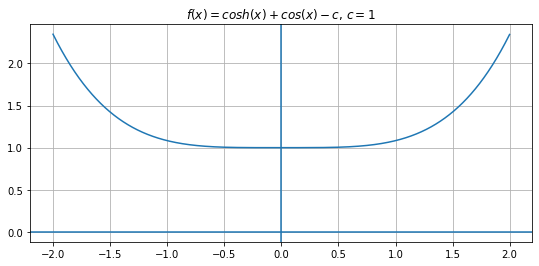

In [7]:
c = 1
f = g(c)
search_range = np.arange(-2.0, 2.0, 0.001)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [8]:
# Hint: root = ?
root = None


In [9]:
print('My estimation of root:', root)

My estimation of root: None


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

In [10]:
root = bisection(g(c), [-1.0, 1.0], max_iterations=100, tolerance=1e-10, report_history=False)

AssertionError: This initial interval does not satisfied the prerequisites!

the estimation failed since the function $cosh(x) + cos(x) - 1$ is always positive. It is not possible to find an interval [a, b]

s.t. f(a) * f(b) < 0

---

### 4. Answer the following questions under the case $c=2$.

### Plot the function to find an interval that contains the zero of $f$ if possible.

In [ ]:
c = 2
f = g(c)
search_range = np.arange(-0.1, 0.1, 0.0001)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [ ]:
# Hint: root = ?
root = 0


In [ ]:
print('My estimation of root:', root)


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

In [ ]:
root = bisection(g(c), [-1.0, 1.0], max_iterations=100, tolerance=1e-10, report_history=False)

the estimation failed since the function $cosh(x) + cos(x) - 2$ is always greater than or equal to 0. It is not possible to find an interval [a, b]

s.t. f(a) * f(b) < 0

---

### 5. Answer the following questions under the case $c=3$.

### Plot the function to find an interval that contains the zeros of $f$ if possible.

In [ ]:
c = 3
f = g(c)
search_range = np.arange(-2.5, 2.5, 0.01)
# ====================

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(search_range, f(search_range))
ax.set_title(r'$f(x)=cosh(x)+cos(x)-c$, $c=$%d' % c)
ax.grid(True)
ax.axhline(y=0)
ax.axvline(x=0)
plt.show()

### According to the figure above, estimate the zero of $f$.

#### For example, 

~~~python
root = 3        # 單根
root = -2, 1    # 多根
root = None     # 無解
~~~

In [ ]:
# Hint: root = ?
root = -1.8, 1.8


In [ ]:
print('My estimation of root:', root)


### Try to find the zero with a tolerance of $10^{-10}$. If it works, plot the error and estimation of each step. Otherwise, state the reason why the method failed on this case.

In [ ]:
root1 = bisection(g(c), [-2, 0], max_iterations=100, tolerance=1e-10, report_history=True)
root2 = bisection(g(c), [0, 2], max_iterations=100, tolerance=1e-10, report_history=True)
print("The roots are {} and {}.".format(root1[0], root2[0]))

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(16, 9))
ax1, ax2 = axes

ax1.plot(range(len(root1[1]['error'])), root1[1]['error'], 'r')
ax1.plot(range(len(root1[1]['estimation'])), root1[1]['estimation'], 'g')
ax1.set_title("The error(red) and estimation(green) of each step of root1")
ax1.grid(True)
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')

ax2.plot(range(len(root2[1]['error'])), root2[1]['error'], 'r')
ax2.plot(range(len(root2[1]['estimation'])), root2[1]['estimation'], 'g')
ax2.set_title("The error(red) and estimation(green) of each step of root2")
ax2.grid(True)
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')

plt.show()

---

## Discussion

### For all cases above(c=1,2,3), do the results(e.g. error behaviors, estimations, etc) agree with the theoretical analysis?

In [ ]:
c=1 時函數恆為正，沒有根

c=2 時只有在原點處函數等於0，其他地方都大於0，無法用此方法求解
c=3 的情況有兩個根，所以各自給相對應的區間 [-2, 0], [0, 2]。

根據

$$|error| < \frac{|b-a|}{2^{n+1}} \implies 10^{-10} < \frac{2}{2^{n+1}} \implies n > \log_2(10^{10}) \implies n \geq 34.$$


In [ ]:
np.log(10**10)/np.log(2)

In [ ]:
print(len(root1[1]['estimation']))
print(len(root2[1]['estimation']))

In [ ]:
35 > 34

agree with the theoretical analysis